In [1]:
# import the libraries
import numpy as np
import torch
import torchvision

In [2]:
trainingdata = torchvision.datasets.FashionMNIST('./FashionMNIST/',train=True,download=True,transform=torchvision.transforms.ToTensor())
testdata = torchvision.datasets.FashionMNIST('./FashionMNIST/',train=False,download=True,transform=torchvision.transforms.ToTensor())


100%|██████████| 26.4M/26.4M [00:02<00:00, 12.6MB/s]


Extracting ./FashionMNIST/FashionMNIST/raw/train-images-idx3-ubyte.gz to ./FashionMNIST/FashionMNIST/raw



100%|██████████| 29.5k/29.5k [00:00<00:00, 198kB/s]


Extracting ./FashionMNIST/FashionMNIST/raw/train-labels-idx1-ubyte.gz to ./FashionMNIST/FashionMNIST/raw



100%|██████████| 4.42M/4.42M [00:01<00:00, 3.72MB/s]


Extracting ./FashionMNIST/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ./FashionMNIST/FashionMNIST/raw



100%|██████████| 5.15k/5.15k [00:00<00:00, 11.9MB/s]

Extracting ./FashionMNIST/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ./FashionMNIST/FashionMNIST/raw



In [3]:
print(len(trainingdata))
print(len(testdata))

60000
10000


In [4]:
image, label = trainingdata[0]
print(image.shape, label)

torch.Size([1, 28, 28]) 9


In [5]:
print(image.squeeze().shape)

torch.Size([28, 28])


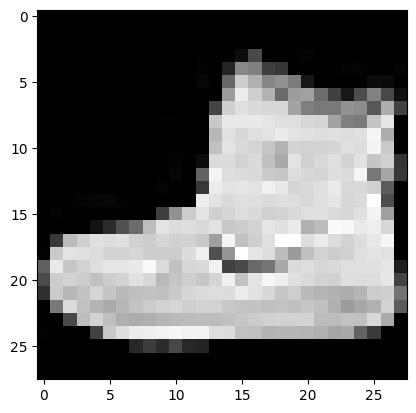

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(image.squeeze(), cmap=plt.cm.gray)

In [7]:
trainDataLoader = torch.utils.data.DataLoader(trainingdata,batch_size=64,shuffle=True)
testDataLoader = torch.utils.data.DataLoader(testdata,batch_size=64,shuffle=False)

In [8]:
print(len(trainDataLoader))
print(len(testDataLoader))

938
157


In [9]:
print(len(trainDataLoader) * 64) # batch_size from above
print(len(testDataLoader) * 64)

60032
10048


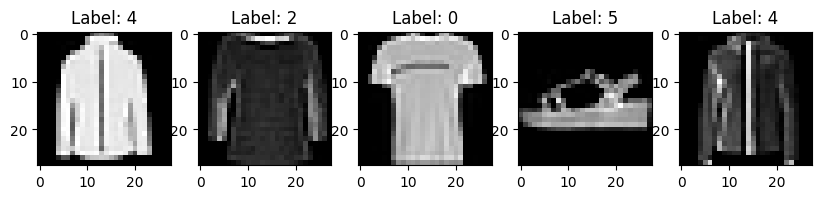

In [10]:
images, labels = next(iter(trainDataLoader))

plt.figure(figsize=(10,4))
for index in np.arange(0,5):
  plt.subplot(1,5,index+1)
  plt.title(f'Label: {labels[index].item()}')
  plt.imshow(images[index].squeeze(),cmap=plt.cm.gray)

In [17]:
class FashionMNISTModel(torch.nn.Module):
  def __init__(self):
    super(FashionMNISTModel,self).__init__()
    self.fc1 = torch.nn.Linear(28*28, 256)
    self.fc2 = torch.nn.Linear(256, 128)
    self.fc3 = torch.nn.Linear(128, 64)
    self.fc4 = torch.nn.Linear(64, 10)
    self.relu = torch.nn.ReLU()

  def forward(self, x):
    x = x.view(-1, 28*28)
    x = self.relu(self.fc1(x))
    x = self.relu(self.fc2(x))
    x = self.relu(self.fc3(x))
    x = self.fc4(x)
    return x

model = FashionMNISTModel().cuda() # Step 1: architecture
loss = torch.nn.CrossEntropyLoss() # Step 2: loss
optimizer = torch.optim.SGD(model.parameters(), lr=0.01) # Step 3: training method

In [19]:
train_loss_history = []
test_loss_history = []

for epoch in range(50):
  train_loss = 0.0
  test_loss = 0.0

  model.train()
  for i, data in enumerate(trainDataLoader):
    images, labels = data
    images = images.cuda()
    labels = labels.cuda()
    optimizer.zero_grad() # zero out any gradient values from the previous iteration
    predicted_output = model(images) # forward propagation
    fit = loss(predicted_output, labels)  # calculate our measure of goodness
    fit.backward() # backpropagation
    optimizer.step() # update the weights of our trainable parameters
    train_loss += fit.item()

  model.eval()
  for i, data in enumerate(testDataLoader):
    with torch.no_grad():
      images, labels = data
      images = images.cuda()
      labels = labels.cuda()
      predicted_output = model(images)
      fit = loss(predicted_output, labels)
      test_loss += fit.item()
  train_loss = train_loss / len(trainDataLoader)
  test_loss = test_loss / len(testDataLoader)
  train_loss_history += [train_loss]
  test_loss_history += [test_loss]
  print(f'Epoch {epoch}, Train loss {train_loss}, Test loss {test_loss}')

Epoch 0, Train loss 0.8200335381572434, Test loss 0.7326804498198686
Epoch 1, Train loss 0.665718307690834, Test loss 0.7116923011412286
Epoch 2, Train loss 0.5906475426228062, Test loss 0.5926861100515742
Epoch 3, Train loss 0.5457974640863028, Test loss 0.5606379247015449
Epoch 4, Train loss 0.5148079536362752, Test loss 0.5363499848705948
Epoch 5, Train loss 0.49167311339299563, Test loss 0.5114035538047742
Epoch 6, Train loss 0.4729746097663064, Test loss 0.4943873890835768
Epoch 7, Train loss 0.4577874707927836, Test loss 0.48849217717055304
Epoch 8, Train loss 0.4445181418297642, Test loss 0.5671002291570044
Epoch 9, Train loss 0.43125458921133075, Test loss 0.4638637961096065
Epoch 10, Train loss 0.4216652001176816, Test loss 0.46319339448099683
Epoch 11, Train loss 0.411558430713377, Test loss 0.4597173428079884
Epoch 12, Train loss 0.401729068665235, Test loss 0.44516734247374684
Epoch 13, Train loss 0.3918211419445111, Test loss 0.5210342504036655
Epoch 14, Train loss 0.38374

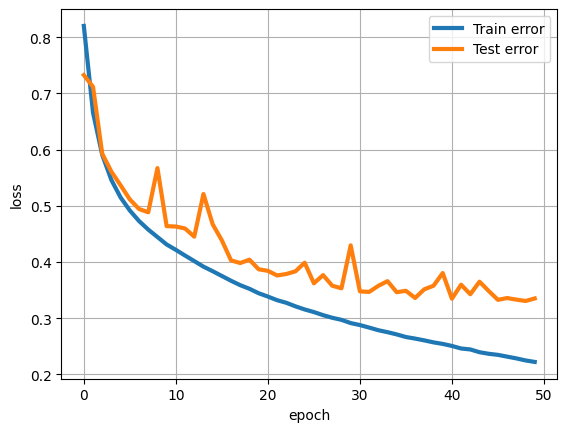

In [20]:
plt.plot(range(50),train_loss_history,'-',linewidth=3,label='Train error')
plt.plot(range(50),test_loss_history,'-',linewidth=3,label='Test error')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.grid(True)
plt.legend()
plt.show()

Using device: cuda


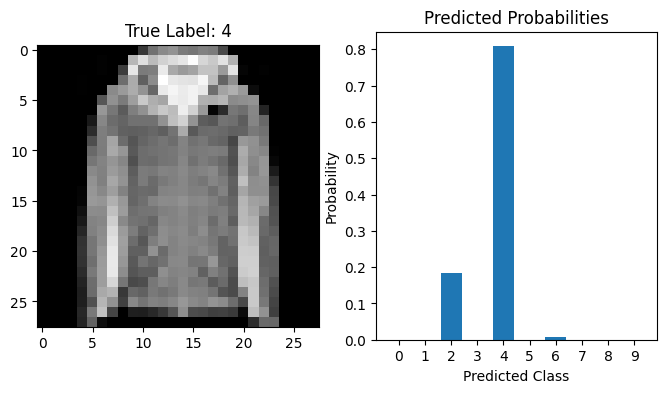

Observation for sample 1:
The model predicts class 4 with the highest probability.
The true label is 4.
--------------------


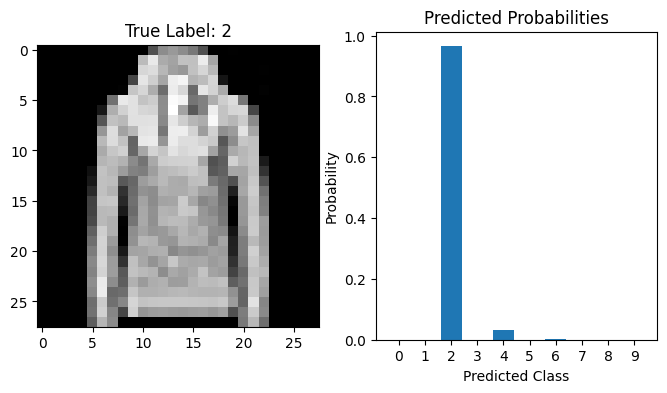

Observation for sample 2:
The model predicts class 2 with the highest probability.
The true label is 2.
--------------------


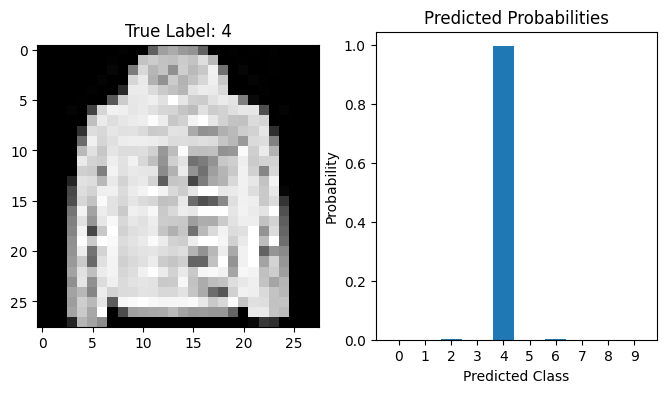

Observation for sample 3:
The model predicts class 4 with the highest probability.
The true label is 4.
--------------------


In [27]:
# draw any 3 random image samples from the test dataset, visualize the
# predicted class probabilities for each sample, and comment on what you can observe from these plots.

import matplotlib.pyplot as plt
import random

# Select 3 random indices from the test dataset
random_indices = random.sample(range(len(testdata)), 3)

# Get the images and labels for the selected samples
images = [testdata[i][0] for i in random_indices]
labels = [testdata[i][1] for i in random_indices]

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")  # 确定设备
print(f"Using device: {device}")
model.to(device)

# Get predicted probabilities
model.eval()
with torch.no_grad():
    predicted_probabilities = [
        torch.softmax(model(image.unsqueeze(0).to(device)), dim=1).squeeze()
         for image in images]

# Visualize and comment on predicted probabilities
for i in range(3):
    plt.figure(figsize=(8, 4))
    plt.subplot(1, 2, 1)
    plt.imshow(images[i].squeeze(), cmap=plt.cm.gray)
    plt.title(f"True Label: {labels[i]}")

    plt.subplot(1, 2, 2)
    plt.bar(range(10), predicted_probabilities[i].cpu().numpy())
    plt.xticks(range(10))
    plt.xlabel("Predicted Class")
    plt.ylabel("Probability")
    plt.title(f"Predicted Probabilities")
    plt.show()

    print(f"Observation for sample {i+1}:")
    print(f"The model predicts class {torch.argmax(predicted_probabilities[i])} with the highest probability.")
    print(f"The true label is {labels[i]}.")
    print("-"*20)


Comment on these plots:

1. The training loss decreases gradually as the epoch increases.

2. From the loss curves, the training loss continues to decrease while the testing loss tends to level off, indicating that the model generalizes well on the test set.

3. On 3 randomly selected test images, we visualized the model's category probability distribution, showing its strong categorization ability.
